In [1]:
!pip install transformers -q
!pip install sentencepiece -q

In [2]:
import pandas as pd
from transformers import AutoModel, AutoTokenizer

import sys
# For running via Colab
sys.path.append('/content/drive/MyDrive/Colab Notebooks')
from bert_finetuner import *

In [3]:
data = pd.read_json('/content/drive/MyDrive/mp3_data_w_vectors.json')
#data = pd.read_json('https://raw.githubusercontent.com/pradeep-miriyala/multi-modal-bert-models/main/data/song_lyric_map.json?token=ADXRNFRS46PTRG46WUZLXHDBKH7HY')
data['iGenre'] = data.apply(lambda x:int(x.Genre=='Devotional'),axis=1)

In [4]:
gpu = torch.device("cuda")
cpu = torch.device("cpu")

In [5]:
muril_model = AutoModel.from_pretrained("google/muril-base-cased")
tokenizer = AutoTokenizer.from_pretrained("google/muril-base-cased")
for param in muril_model.parameters(): 
  param.requires_grad = True

Downloading:   0%|          | 0.00/411 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/909M [00:00<?, ?B/s]

Some weights of the model checkpoint at google/muril-base-cased were not used when initializing BertModel: ['cls.predictions.decoder.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/181 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.02M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/113 [00:00<?, ?B/s]

In [6]:
sequences, attention_masks, targets = process_data_w_base_model(data, tokenizer, max_seq_len=25)

In [7]:
txt_results = k_fold_model_preparation(muril_model, gpu, False, data, sequences, attention_masks, targets,
                                       k_folds=5, epochs=5, balance_classes=False)

Running Text Only Classification
FOLD 0
--------------------------------

 Epoch 1 / 5
Training Model
  Batch    20  of     55.
  Batch    40  of     55.
Evaluating
Training Loss: 0.677
Validation Loss: 0.674

 Epoch 2 / 5
Training Model
  Batch    20  of     55.
  Batch    40  of     55.
Evaluating
Training Loss: 0.672
Validation Loss: 0.668

 Epoch 3 / 5
Training Model
  Batch    20  of     55.
  Batch    40  of     55.
Evaluating
Training Loss: 0.663
Validation Loss: 0.655

 Epoch 4 / 5
Training Model
  Batch    20  of     55.
  Batch    40  of     55.
Evaluating
Training Loss: 0.643
Validation Loss: 0.628

 Epoch 5 / 5
Training Model
  Batch    20  of     55.
  Batch    40  of     55.
Evaluating
Training Loss: 0.612
Validation Loss: 0.618
On Train Data
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       296
           1       0.66      1.00      0.80       581

    accuracy                           0.66       877
   macro avg   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  Batch    20  of     55.
  Batch    40  of     55.
Evaluating
Training Loss: 0.675
Validation Loss: 0.656

 Epoch 2 / 5
Training Model
  Batch    20  of     55.
  Batch    40  of     55.
Evaluating
Training Loss: 0.648
Validation Loss: 0.629

 Epoch 3 / 5
Training Model
  Batch    20  of     55.
  Batch    40  of     55.
Evaluating
Training Loss: 0.615
Validation Loss: 0.588

 Epoch 4 / 5
Training Model
  Batch    20  of     55.
  Batch    40  of     55.
Evaluating
Training Loss: 0.571
Validation Loss: 0.548

 Epoch 5 / 5
Training Model
  Batch    20  of     55.
  Batch    40  of     55.
Evaluating
Training Loss: 0.531
Validation Loss: 0.513
On Train Data
              precision    recall  f1-score   support

           0       0.85      0.77      0.81       296
           1       0.89      0.93      0.91       581

    accuracy                           0.88       877
   macro avg       0.87      0.85      0.86       877
weighted avg       0.87      0.88      0.87       877

On Test 

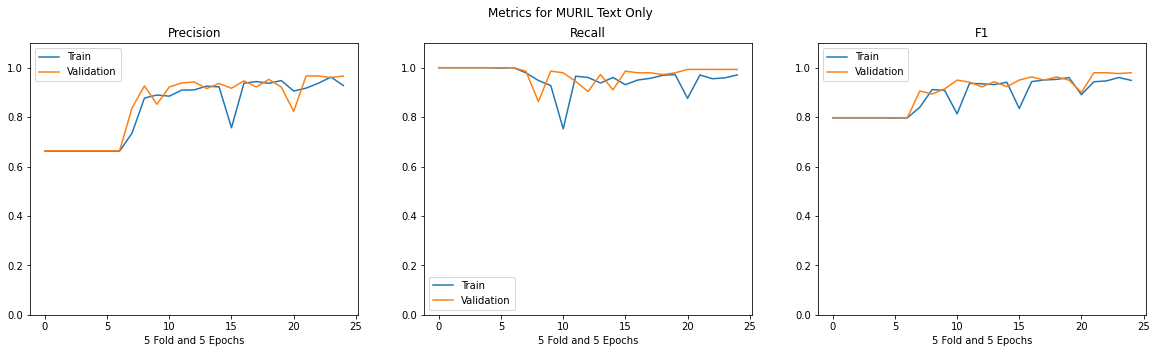

In [8]:
plot_results(txt_results,'MURIL Text Only')

In [9]:
fusion_results = k_fold_model_preparation(muril_model, gpu, True, data, sequences, attention_masks, targets,
                             k_folds=5, epochs=5, balance_classes=False)

Running Fusion Model
FOLD 0
--------------------------------

 Epoch 1 / 5
Training Model
  Batch    20  of     55.
  Batch    40  of     55.
Evaluating
Training Loss: 0.667
Validation Loss: 0.626

 Epoch 2 / 5
Training Model
  Batch    20  of     55.
  Batch    40  of     55.
Evaluating
Training Loss: 0.605
Validation Loss: 0.564

 Epoch 3 / 5
Training Model
  Batch    20  of     55.
  Batch    40  of     55.
Evaluating
Training Loss: 0.514
Validation Loss: 0.445

 Epoch 4 / 5
Training Model
  Batch    20  of     55.
  Batch    40  of     55.
Evaluating
Training Loss: 0.389
Validation Loss: 0.310

 Epoch 5 / 5
Training Model
  Batch    20  of     55.
  Batch    40  of     55.
Evaluating
Training Loss: 0.282
Validation Loss: 0.245
On Train Data
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       296
           1       0.96      0.96      0.96       581

    accuracy                           0.95       877
   macro avg       0.94    

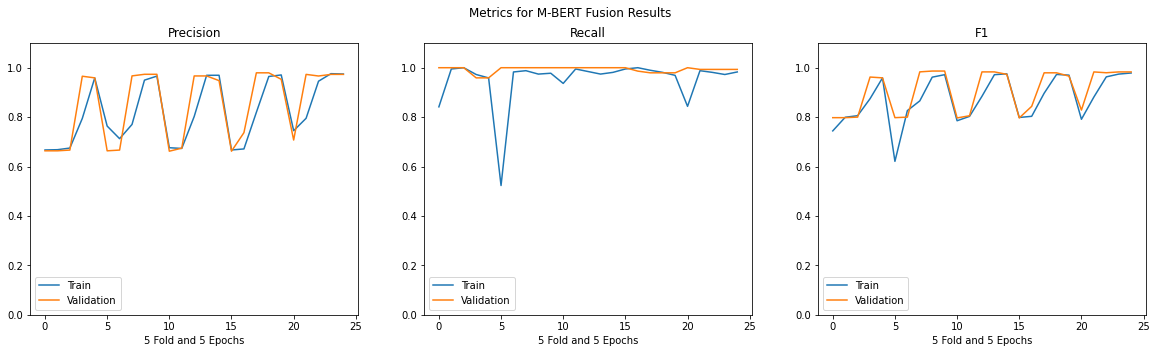

In [10]:
plot_results(fusion_results,'M-BERT Fusion Results')